In [1]:
import csv
import numpy as np
import methods as met;
from sklearn.metrics import jaccard_score

with open('../.idea/matrix-pl-20211020', 'r', encoding='UTF-8') as file:
    matrix_raw = file.readlines()
    del matrix_raw[0]
    matrix = []
    article_id = []
    for row in matrix_raw:
        splitted_row = row.split()
        article_id.append(splitted_row[0])
        del splitted_row[0]
        matrix.append(splitted_row)

with open('../.idea/cats_dict-pl-20211020', 'r', encoding='UTF-8') as file:
    data_iter = csv.reader(file, delimiter = '\t')
    data = [data for data in data_iter]
categories_dict = {int(i[1]):i[0] for i in data}

with open('../.idea/categories-pl-20211020', 'r', encoding='UTF-8') as file:
    data_iter = csv.reader(file, delimiter = '\t')
    data = [data for data in data_iter]
categories_articles = np.asarray(data, dtype=np.int32)

with open('../.idea/articles_dict-pl-20211020', 'r', encoding='UTF-8') as file:
    data_iter = csv.reader(file, delimiter = '\t')
    data = [data for data in data_iter]
articles_dict = {int(i[1]):i[0] for i in data}

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = np.array(matrix, dtype=np.int32)
y = categories_articles[:, 1]


In [3]:
# Equalizing the number of articles in categories
"""
import pandas as pd
my_count = pd.Series(categories_articles[:,1]).value_counts()
w, h = 2, my_count.min()
matrix_tmp = [[0 for x in range(w)] for y in range(h)]
matrix_of_appearances = [[0 for x in range(w)] for y in range(h)]
new_matrix = []
new_categories_articles = []
i = 0
for row in my_count.index:
    matrix_of_appearances[i][0] = row
    matrix_tmp[i][0] = row
    i = i + 1
for row in categories_articles:
    if matrix_of_appearances[matrix_tmp.index([row[1],0])][1] < my_count.min():
        matrix_of_appearances[matrix_tmp.index([row[1],0])][1] = matrix_of_appearances[matrix_tmp.index([row[1],0])][1] + 1
        new_categories_articles.append(row)

with open('../.idea/matrix-pl-20211020', 'r', encoding='UTF-8') as file:
    matrix_raw_norm = file.readlines()
    del matrix_raw_norm[0]
    matrix_to_norm = []
    article_id = []
    for row in matrix_raw_norm:
        splitted_row = row.split()
        article_id.append(splitted_row[0])
        matrix_to_norm.append(splitted_row)


for row_matrix in matrix_to_norm:
    for row_categories_articles in new_categories_articles:
        if int(row_matrix[0]) == row_categories_articles[0]:
            new_matrix.append(row_matrix)
            break
for row in new_matrix:
    del row[0]

print("Najmniej artykułów w kategorii: " + str(my_count.min()))
print("Najwięcej artykułów w kategorii: " + str(my_count.max()))
print("Liczba artykułów przed normalizacją: " + str(len(matrix)))
print("Liczba artykułów po normalizacji: "+ str(len(new_matrix)))
matrix = np.array(new_matrix)
categories_articles = np.array(new_categories_articles)
"""

'\nimport pandas as pd\nmy_count = pd.Series(categories_articles[:,1]).value_counts()\nw, h = 2, my_count.min()\nmatrix_tmp = [[0 for x in range(w)] for y in range(h)]\nmatrix_of_appearances = [[0 for x in range(w)] for y in range(h)]\nnew_matrix = []\nnew_categories_articles = []\ni = 0\nfor row in my_count.index:\n    matrix_of_appearances[i][0] = row\n    matrix_tmp[i][0] = row\n    i = i + 1\nfor row in categories_articles:\n    if matrix_of_appearances[matrix_tmp.index([row[1],0])][1] < my_count.min():\n        matrix_of_appearances[matrix_tmp.index([row[1],0])][1] = matrix_of_appearances[matrix_tmp.index([row[1],0])][1] + 1\n        new_categories_articles.append(row)\n\nwith open(\'../.idea/matrix-pl-20211020\', \'r\', encoding=\'UTF-8\') as file:\n    matrix_raw_norm = file.readlines()\n    del matrix_raw_norm[0]\n    matrix_to_norm = []\n    article_id = []\n    for row in matrix_raw_norm:\n        splitted_row = row.split()\n        article_id.append(splitted_row[0])\n       

In [3]:

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X, y = oversample.fit_resample(X, y)
print("Całkowita liczba artykułów: " + str(len(X)))



Całkowita liczba artykułów: 1640


In [8]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight="balanced" , classes=np.unique(y), y=y)
k = list(zip(categories_dict.values(), class_weights))
for row in k:
    print(row)

('Wydarzenia_opisane_w_Ewangeliach', 1.0)
('Konflikt', 1.0)
('Filozofia_przyrody', 1.0)
('Bóstwa_magii', 1.0)
('Telewizja', 1.0)
('Oszustwa_archeologiczne', 1.0)
('Wykresy', 1.0)
('Włoscy_producenci_samochodów', 1.0)
('Niepełnosprawność', 1.0)
('Bilard', 1.0)
('Górskie_szlaki_turystyczne', 1.0)
('Afery_polityczne', 1.0)
('Ruch_lotniczy', 1.0)
('Zawody_prawnicze', 1.0)
('Miejskie_legendy', 1.0)
('Festiwale_filmowe', 1.0)
('Wypadki_jądrowe', 1.0)
('Oprogramowanie_edukacyjne', 1.0)
('Domy_mody', 1.0)
('Aktualne_wydarzenia_sportowe_-_piłka_nożna', 1.0)


[LibLinear]

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.97242647 0.98455882 0.98768382 0.98805147 0.99411765]
Accuracy: 0.99 (+/- 0.01)
[LibLinear]

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Jaccard score (micro): 0.9711538461538461
[[76  1  2  0  0  0  0  1  0  0  0  0  0  0  0  1  0  1  0  0]
 [ 0 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 76  1  0  0  0  1  0  1  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 79  0  0  0  2  0  0  0  0  1  0  0  0  0]
 [ 2  1  0  0  0  0  0 79  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  1 80  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 81  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 82  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 82  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 82  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 82  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 82  0  0  0  0  0]
 [ 0  0  0  0

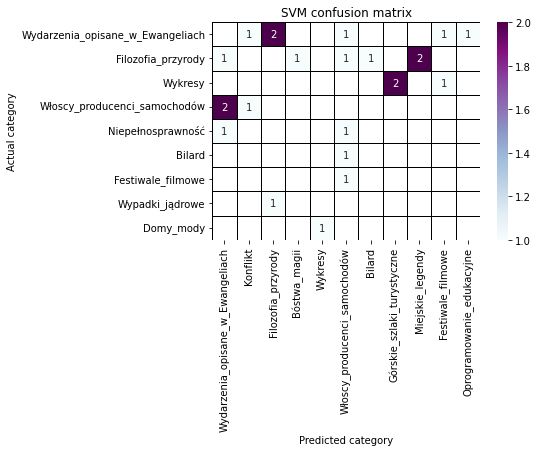

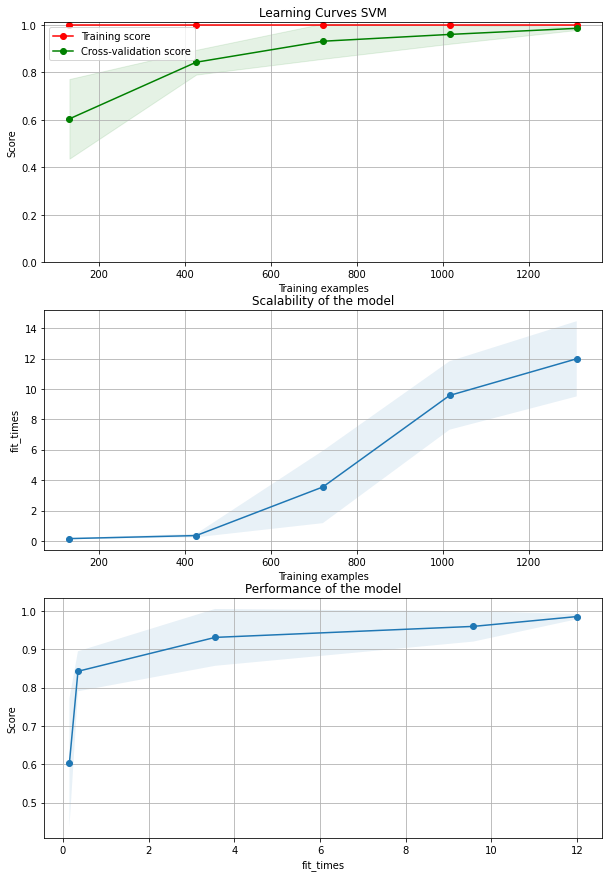

In [6]:
#SVM (LinearSVC)

from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
m_LinearSVC = LinearSVC(tol=1.0e-6,max_iter=5000,verbose=1)
scores = cross_val_score(m_LinearSVC, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_LinearSVC, X, y, cv=5)
print("Jaccard score (micro): " + str(jaccard_score(y, predicted, average='micro')))
met.print_graphs(m_LinearSVC, X=X, y=y, predicted=predicted, estimator_name="SVM", categories_dict=categories_dict)

[0.77022059 0.74540441 0.71875    0.73419118 0.71158088]
Accuracy: 0.74 (+/- 0.02)
Jaccard score (micro): 0.5822479498311626
[[20 12  0 24  2  0  4  2  5  2  1  0  0  1  0  2  0  6  1  0]
 [ 0 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3 23 27  8  0  0  2  0  1  2  1  0  6  1  1  0  0  3  4  0]
 [ 0  0  0 77  0  0  0  2  0  1  0  0  0  0  0  0  0  2  0  0]
 [ 0  7  0  6 56  0  0  0  9  0  0  3  0  0  0  0  0  1  0  0]
 [ 0  0  0  4  0 78  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  0 13  0  0 60  0  0  0  1  0  0  0  0  0  0  3  0  0]
 [ 1 12  1 24  0  1  3 26  3  2  3  0  0  0  0  0  0  4  2  0]
 [ 0  2  0 15  0  0  3  0 62  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  2  8  0  0  1  3  2 55  2  0  0  0  0  0  0  3  1  0]
 [ 0  0  0  4  0  0  0  0  0  1 75  0  0  0  0  0  0  2  0  0]
 [ 0  7  0  4  1  0  0  0  2  0  0 68  0  0  0  0  0  0  0  0]
 [ 0  6  1  8  0  0  0  0  0  0  0  0 67  0  0  0  0  0  0  0]
 [ 0 23  2  5  0  0  0  0  2  0  1  0  0 47  0  0  0  1 

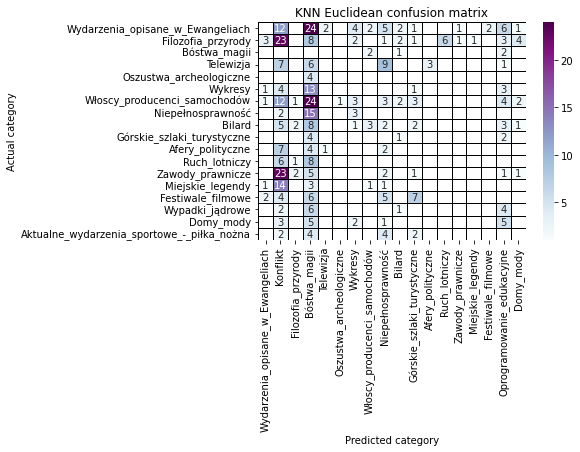

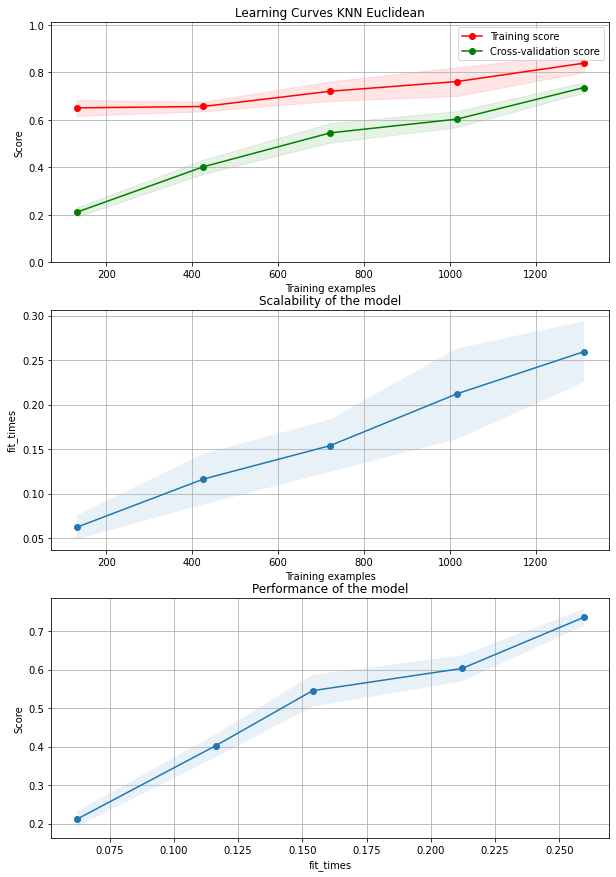

In [7]:
#KNN Euclidean

from sklearn.neighbors import KNeighborsClassifier
m_KNN_E = KNeighborsClassifier(p=2, metric="euclidean")
scores = cross_val_score(m_KNN_E, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_KNN_E, X, y, cv=5)
print("Jaccard score (micro): " + str(jaccard_score(y, predicted, average='micro')))
met.print_graphs(m_KNN_E, X=X, y=y, predicted=predicted, estimator_name="KNN Euclidean", categories_dict=categories_dict)



[0.64117647 0.61176471 0.53731618 0.56323529 0.55955882]
Accuracy: 0.58 (+/- 0.04)
Jaccard score (micro): 0.4113597246127367
[[ 9 52  0 15  0  0  0  0  4  0  0  0  0  0  0  0  0  2  0  0]
 [ 0 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 31 14 26  0  0  0  1  5  0  1  1  0  0  0  0  0  3  0  0]
 [ 0  3  0 77  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0]
 [ 0 10  0  9 48  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0 15  0 58  0  0  2  0  1  0  0  0  0  0  0  0  0  0]
 [ 0 20  0 24  0  0 35  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 1 43  2 19  0  0  1  9  3  1  1  0  0  0  0  0  0  2  0  0]
 [ 0 12  0 19  0  0  0  0 50  0  0  0  0  0  0  0  0  1  0  0]
 [ 2 17  0 25  0  0  0  2  0 33  0  0  0  0  0  0  0  3  0  0]
 [ 0  6  0  7  0  0  3  0  0  0 66  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  8  0  0  0  0  1  0  0 65  0  0  0  0  0  0  0  0]
 [ 0  4  0 13  0  0  3  0  0  0  2  0 60  0  0  0  0  0  0  0]
 [ 0 25  0 25  0  0  0  1  0  0  0  0  0 26  0  0  0  5 

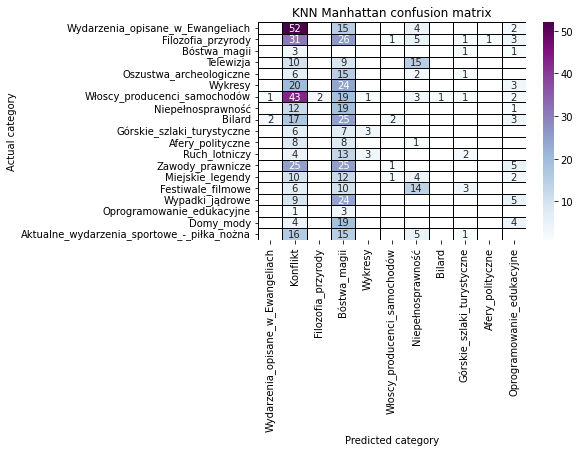

In [ ]:
#KNN Manhattan

from sklearn.neighbors import KNeighborsClassifier
m_KNN_M = KNeighborsClassifier(p=1, metric="manhattan")
scores = cross_val_score(m_KNN_M, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_KNN_M, X, y, cv=5)
print("Jaccard score (micro): " + str(jaccard_score(y, predicted, average='micro')))
met.print_graphs(m_KNN_M, X=X, y=y, predicted=predicted, estimator_name="KNN Manhattan", categories_dict=categories_dict)

[0.88823529 0.92702206 0.93308824 0.94522059 0.92371324]
Accuracy: 0.92 (+/- 0.02)
Jaccard score (micro): 0.8583569405099151
[[63  0  2  0  2  0  0  2  1  1  1  0  0  0  0  5  1  1  3  0]
 [ 0 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2 62  0  2  0  0  2  3  2  1  0  0  1  0  0  0  0  6  0]
 [ 0  0  2 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0 73  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0 81  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  2 77  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  7  2  1  0  3 53  1  1  1  1  0  0  0  1  1  0  8  0]
 [ 0  0  2  0  0  0  0  0 78  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0 73  0  0  1  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 82  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  2  0  0  0  0  0  0  0 77  0  0  0  0  0  0  0]
 [ 0  0  5  0  1  0  0  0  0  3  0  0  0 69  0  0  2  0 

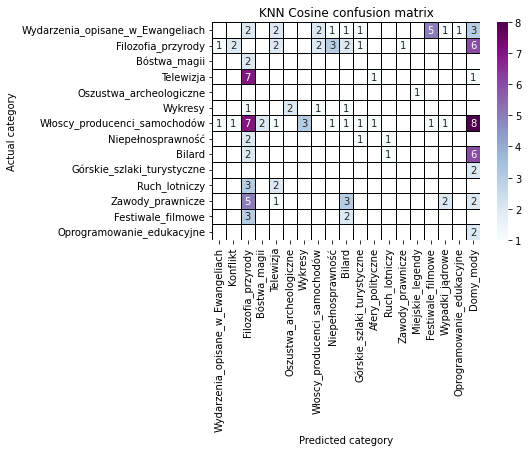

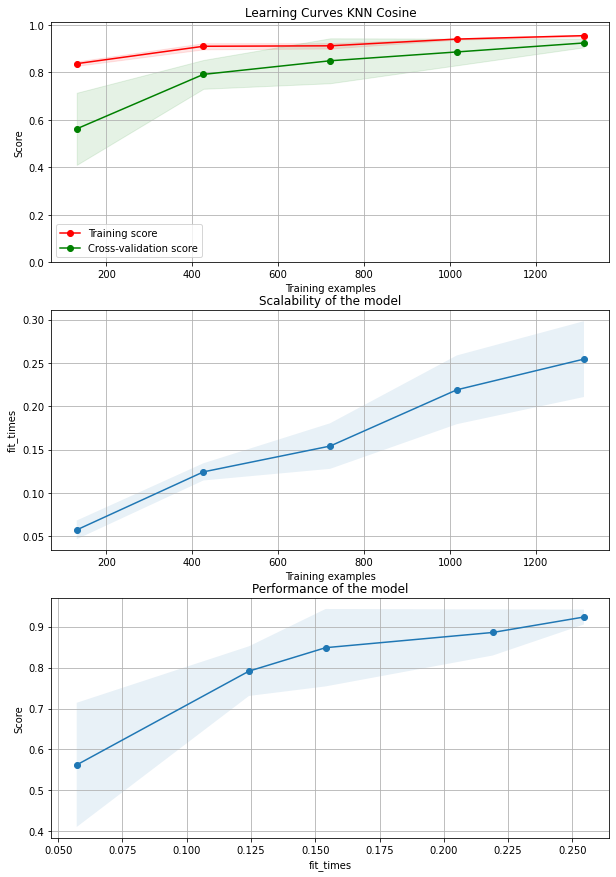

In [4]:
#KNN Cosine

from sklearn.neighbors import KNeighborsClassifier
m_KNN_M = KNeighborsClassifier(p=1, metric="cosine")
scores = cross_val_score(m_KNN_M, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_KNN_M, X, y, cv=5)
print("Jaccard score (micro): " + str(jaccard_score(y, predicted, average='micro')))
met.print_graphs(m_KNN_M, X=X, y=y, predicted=predicted, estimator_name="KNN Cosine", categories_dict=categories_dict)

In [ ]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
m_MNB = MultinomialNB()
scores = cross_val_score(m_MNB, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_MNB, X, y, cv=5)
print("Jaccard score (micro): " + str(jaccard_score(y, predicted, average='micro')))
met.print_graphs(m_MNB, X=X, y=y, predicted=predicted, estimator_name="MNB", categories_dict=categories_dict)

In [ ]:
#Multi-layer Perceptron (bardzo długo się robi)
from sklearn.neural_network import MLPClassifier
m_MLP = MLPClassifier()
scores = cross_val_score(m_MLP, X, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_MLP, X, y, cv=5)
print("Jaccard score (micro): " + str(jaccard_score(y, predicted, average='micro')))
met.print_graphs(m_MLP, X=X, y=y, predicted=predicted, estimator_name="MLP", categories_dict=categories_dict)

In [ ]:
#Multi-layer Perceptron z PCA
from sklearn.decomposition import PCA

# kompresja wymiarów - PCA
pca = PCA()
X_pca = pca.fit(X).transform(X)

m_MLP = MLPClassifier()
scores = cross_val_score(m_MLP, X_pca, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_MLP, X_pca, y, cv=5)
print("Jaccard score (micro): " + str(jaccard_score(y, predicted, average='micro')))
met.print_graphs(m_MLP, X=X_pca, y=y, predicted=predicted, estimator_name="MLP", categories_dict=categories_dict)

In [ ]:
from sklearn.manifold import MDS

# kompresja wymiarów - MDS
embedding = MDS(n_components=5000)
X_mds = embedding.fit_transform(X)

In [ ]:
#Multi-layer Perceptron z MDS

from sklearn.neural_network import MLPClassifier


m_MLP = MLPClassifier()
scores = cross_val_score(m_MLP, X_mds, y, cv=5, scoring='recall_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(m_MLP, X_mds, y, cv=5)
print("Jaccard score (micro): " + str(jaccard_score(y, predicted, average='micro')))
met.print_graphs(m_MLP, X=X_mds, y=y, predicted=predicted, estimator_name="MLP", categories_dict=categories_dict)


In [ ]:
"""
# Przygotowanie bag of words
from numpy import genfromtxt, int32
my_data = genfromtxt('../.idea/matrix-pl-20211020', dtype = int32, skip_header = 1, delimiter=' ')
bag_of_words = dict()

for row in my_data:
    row_dict = dict()
    for i, word_count in enumerate(row[1:], start = 1):
        if word_count > 0:
            row_dict[i] = word_count
    bag_of_words[row[0]] = row_dict
"""